## Spam Detectiona and Sentiment Analysis using Natural Language Processing using email data

__Part 1: Data Preprocessing and generating word cloud__

In [72]:
#Importing required libraries
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [73]:
#Loading email data using pandas
data = pd.read_csv('emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [74]:
data.shape

(5728, 2)

This data contains 2 attributes (text and spam) with 5728 data points

In [75]:
data['spam'].unique()

array([1, 0], dtype=int64)

Spam column contains binary data depicting 1 for spam email and 0 for not a spam email

In [76]:
#Getting the count of the binary variables in spam column
spam = len(data.loc[data.spam==1])
notspam = len(data.loc[data.spam==0])
data['spam'] = data['spam'].astype(int)
print("Spam email count:",spam)
print("Non spam email count:", notspam)

Spam email count: 1368
Non spam email count: 4360


In [77]:
#Dropping the duplicates
data = data.drop_duplicates()
data.shape

(5695, 2)

In [78]:
data = data.reset_index(inplace=False)[['text','spam']]

In [79]:
#Cleaning the data in 'text' column
clean_text = []
for i in range(len(data.text)):
    #Lower casing the text present in that row
    text = data['text'][i].lower()
    #Removing punctuation
    text = re.sub('[^a-zA-Z]',' ',text)
    #Removing tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)
    #Removing digits and special characters
    text = re.sub("(\\d|\\W)+", " ", text)
    clean_text.append(text)
#Assigning the cleaned text to the data frame
data['text'] = clean_text
data = data.reset_index()
data.head()   


,index,text,spam
0,0,subject naturally irresistible your corporate ...,1
1,1,subject the stock trading gunslinger fanny is ...,1
2,2,subject unbelievable new homes made easy im wa...,1
3,3,subject color printing special request additio...,1
4,4,subject do not have money get software cds fro...,1


Now, removing the stop words like 'the', 'of', 'your' etc., from the email text allows the more relevant frequent words to stand out

In [80]:
#Creating a list of stop words
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']

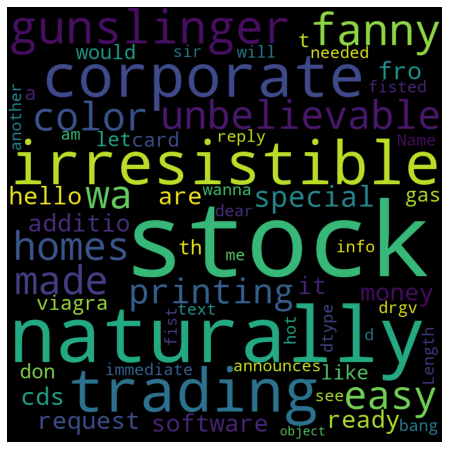

In [81]:
#Creating the word cloud for spam emails
data_spam = data.loc[data.spam==1]
#Generating word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(data_spam['text']))
#Plotting the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

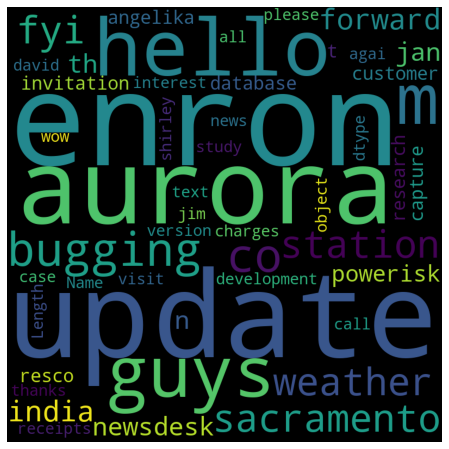

In [82]:
#Creating the word cloud for non spam emails
data_notspam = data.loc[data.spam==0]
#Generating word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(data_notspam['text']))
#Plotting the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

__Part 2: Spam Detection for email data__

- This is a binary classification problem since an email can be spam (1) or not spam (0)
- I'm building a machine learning model that can identify whether an email is spam or not
- I will explore about tokenization, vectorization and statistical algorithms while building this model

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report, accuracy_score

In [85]:
#Implementing this on a sample text data
text = ["my name is santhosh", "i work as a data scientist", "it is exciting to work on this project"]

#Instantiating count vectorizer class
cv = CountVectorizer()
#Tokenizing and building vocab
cv.fit(text)

CountVectorizer()

Summarizing the parameters of count vectorizer

In [86]:
cv.vocabulary_

{'my': 5,
 'name': 6,
 'is': 3,
 'santhosh': 9,
 'work': 13,
 'as': 0,
 'data': 1,
 'scientist': 10,
 'it': 4,
 'exciting': 2,
 'to': 12,
 'on': 7,
 'this': 11,
 'project': 8}

In [87]:
vector = cv.transform(text)
vector.toarray()

array([[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1]], dtype=int64)

In [88]:
#Now implementing this process to email data
text_vec = CountVectorizer().fit_transform(data['text'])

X_train, X_test, y_train, y_test = train_test_split(text_vec, data['spam'], test_size = 0.45, random_state=42, shuffle=True)

In [89]:
classifier = ensemble.GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.5,
            max_depth=6,
            )

In [90]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1926
           1       0.97      0.90      0.94       637

    accuracy                           0.97      2563
   macro avg       0.97      0.95      0.96      2563
weighted avg       0.97      0.97      0.97      2563



This model is 97% accurate